## Inteligência Artificial / UFPB
Aluno: Bruno Soares de oliveira lopes. <br>
Matricula:20200136697 <br>
Dataset: <a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>


**1)** Utilizando a base de dados de
<a href="https://www.kaggle.com/datasets/csafrit2/higher-education-students-performance-evaluation">Higher Education Students Performance Evaluation</a>, elabore uma solução para identificar o OUTPUT Grade do estudante. Lembre-se de
comentar seu código no notebook detalhadamente, explicando cada passo.
 <br>

- (A) Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e
deixe os seus dados preparados para aplicar o modelo. <br> <br>
- (B) Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando
a aplicação de técnicas de under ou oversampling para que as classes tenham o
mesmo tamanho. <br> <br>
- (C) Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo,
teste 3 variações de um dos seus hiperparâmetros. <br> <br>
- (D) Para avaliar os resultados, utilize e explique a matriz de confusão. Além disso,
escolha 2 métricas de sua preferência e o que o seu resultado significa.

#### (A) Faça o pré-processamento dos dados (limpeza, engenharia de variáveis, etc) e deixe os seus dados preparados para aplicar o modelo. <br> <br>

**Dependencias**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import KMeansSMOTE

**DATASET**

In [3]:
def Read_CSV(arquivo):
    leitura = pd.read_csv(arquivo, encoding='utf-8', sep=',' )
    return leitura

In [4]:

HESPE_DATA = Read_CSV('Dados\student_prediction.csv')
HESPE_DATA.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


**Identificando os valores numericos**

In [5]:
HESPE_DATA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 33 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   STUDENTID      145 non-null    object
 1   AGE            145 non-null    int64 
 2   GENDER         145 non-null    int64 
 3   HS_TYPE        145 non-null    int64 
 4   SCHOLARSHIP    145 non-null    int64 
 5   WORK           145 non-null    int64 
 6   ACTIVITY       145 non-null    int64 
 7   PARTNER        145 non-null    int64 
 8   SALARY         145 non-null    int64 
 9   TRANSPORT      145 non-null    int64 
 10  LIVING         145 non-null    int64 
 11  MOTHER_EDU     145 non-null    int64 
 12  FATHER_EDU     145 non-null    int64 
 13  #_SIBLINGS     145 non-null    int64 
 14  KIDS           145 non-null    int64 
 15  MOTHER_JOB     145 non-null    int64 
 16  FATHER_JOB     145 non-null    int64 
 17  STUDY_HRS      145 non-null    int64 
 18  READ_FREQ      145 non-null   

**Identificado que a base não tem valores NULL** <br>


In [6]:
HESPE_DATA.isnull().sum()

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

**Pré-processamento dos dados**

**Realizando um filtro com objetivo de trabalhar os valores numéricos**

Analisando o Dataset foi idenficiado 2 atributos que não são relevantes para o Modelo.
> -    STUDENTID - Identificador do Estudante
> -    COURSE ID - Indentificador para o Curso.

In [7]:
DATA_AUX = HESPE_DATA.copy()
DATA_AUX = DATA_AUX.drop(["STUDENTID","COURSE ID"],axis=1)
DATA_AUX.head()

,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,LIVING,...,ATTEND,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,GRADE
0,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,1,2,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,1,1,3,2,3,2,2,3,1
2,2,2,2,3,2,2,2,2,4,2,...,1,1,1,2,2,1,1,2,2,1
3,1,1,1,3,1,2,1,2,1,2,...,1,1,2,3,2,2,1,3,2,1
4,2,2,1,3,2,2,1,3,1,4,...,1,2,1,2,2,2,1,2,2,1


**Correlação**

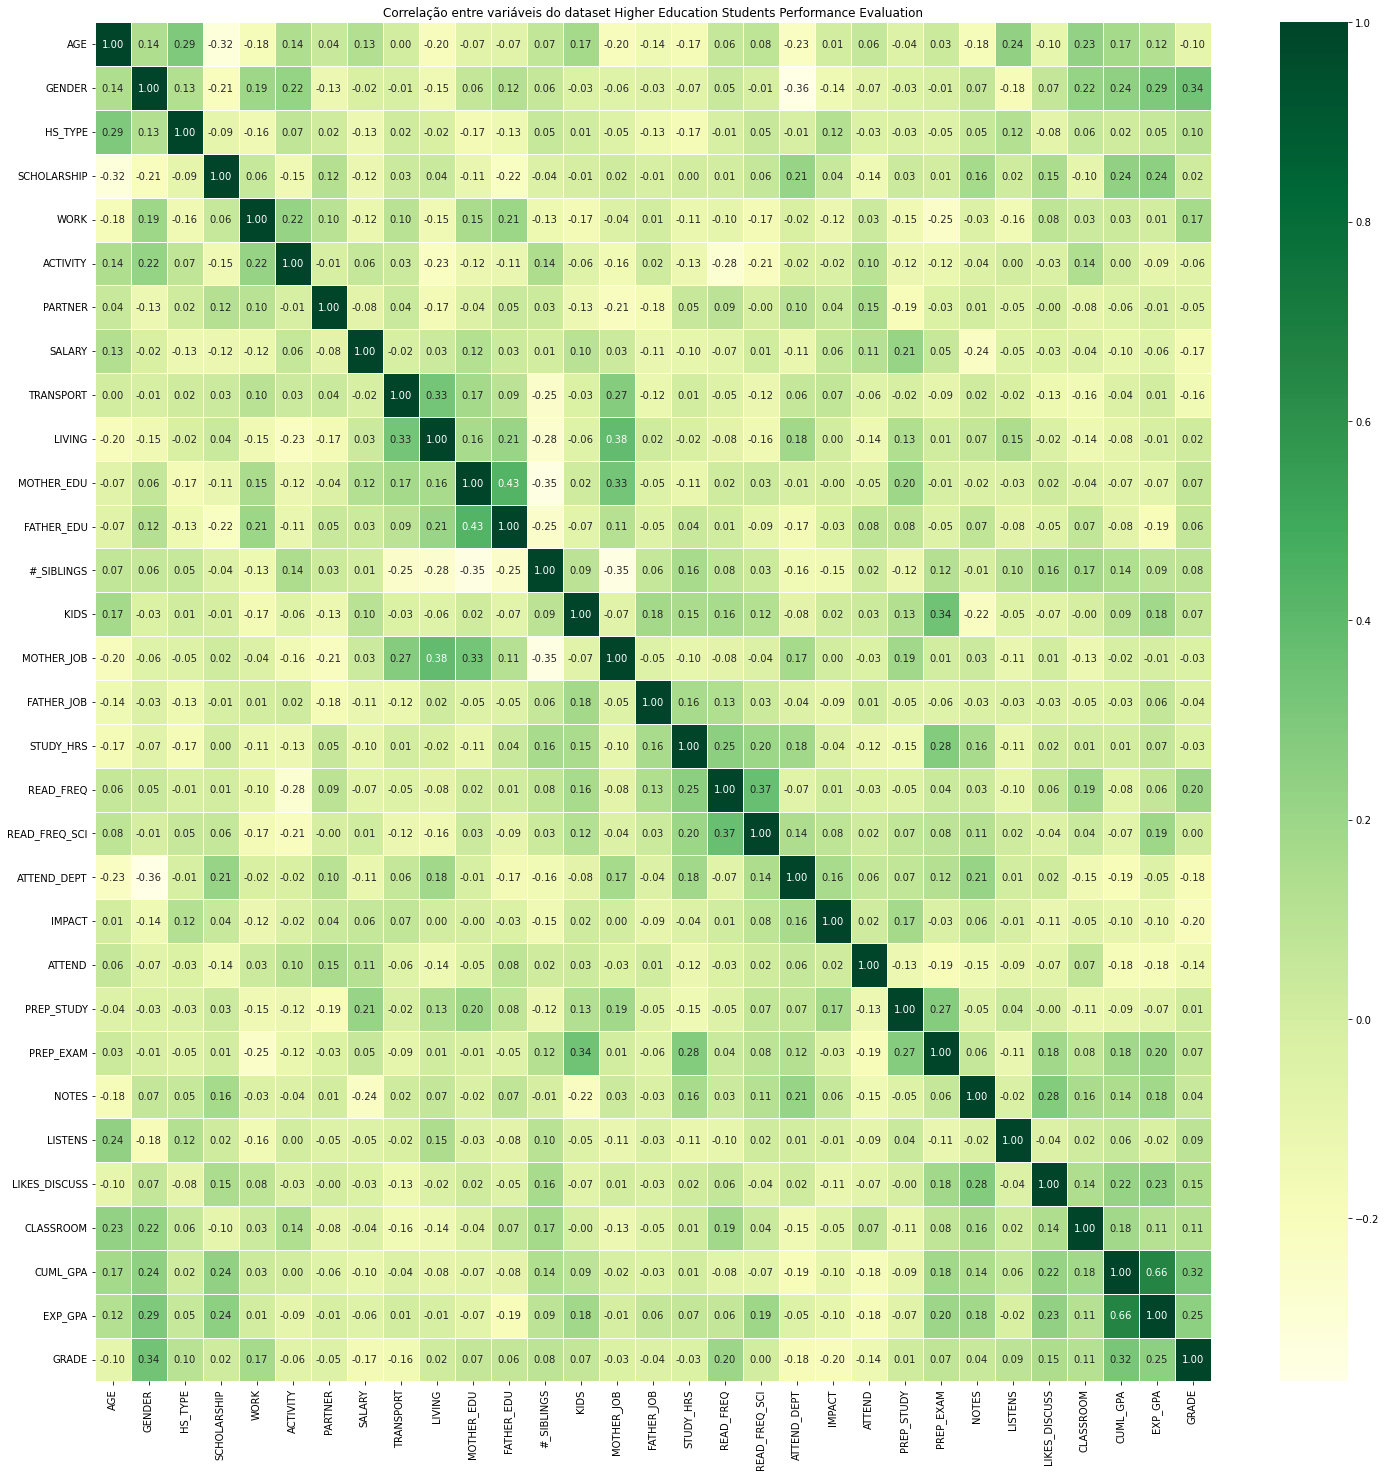

In [8]:
plt.figure(figsize = (25, 25))
sns.heatmap(DATA_AUX.corr(), cmap = "YlGn",annot=True,linewidths=.7,fmt=".2f")
plt.title('Correlação entre variáveis do dataset Higher Education Students Performance Evaluation')
plt.show()

Analisando o gráfico  de correlação, é possivel identificar uma maior relação em 2 atributos, representando 0,66.
> - EXP_GPA
> - CUML_GPA 

#### (B) Faça uma análise exploratória dos dados de saída, utilizando box plot, mostrando a aplicação de técnicas de under ou oversampling para que as classes tenham o mesmo tamanho. <br> <br>

Text(0.5, 1.0, 'Higher Education Students Performance Evaluation - Avaliação dos Estudantes.')

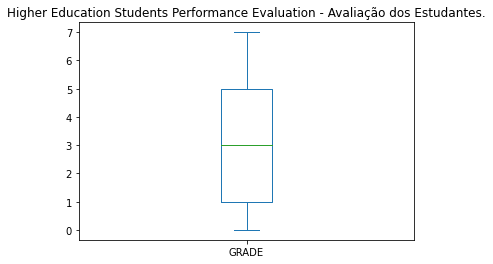

In [9]:
HESPE_DATA_PLT = HESPE_DATA["GRADE"].sort_index().plot(kind="box")
HESPE_DATA_PLT.set_title('Higher Education Students Performance Evaluation - Avaliação dos Estudantes.')

> - Analisando o Boxplot é possivel observar que existe uma concentração maior de valores onde indica melhores notas, representado nos intervalos de 1º e 3º Quartil.

Text(0.5, 1.0, 'Higher Education Students Performance Evaluation - Avaliação dos Estudantes.')

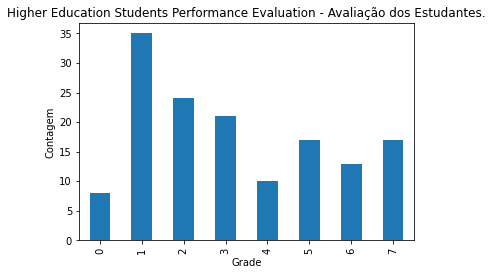

In [10]:
HESPE_DATA_PLT = HESPE_DATA["GRADE"].value_counts().sort_index().plot(kind="bar")
HESPE_DATA_PLT.set_xlabel('Grade')
HESPE_DATA_PLT.set_ylabel('Contagem')
HESPE_DATA_PLT.set_title('Higher Education Students Performance Evaluation - Avaliação dos Estudantes.')

> - Em representação de barras podemos observar também essa distribuição desbalanceada, maiores valores de contagem onde tem as menores notas.

In [21]:
SmHespe = KMeansSMOTE(kmeans_estimator=1, n_jobs=-1, random_state=42, cluster_balance_threshold=0)

DATA_AUX_ANON = DATA_AUX.drop(labels=['GRADE'], axis=1)
DATA_AUX_ANON, dstudent_grade = SmHespe.fit_resample(DATA_AUX_ANON, DATA_AUX['GRADE'])
HespeBalanceado = pd.concat([DATA_AUX_ANON, dstudent_grade], axis=1)


c:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
c:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1836: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2048 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn

[]

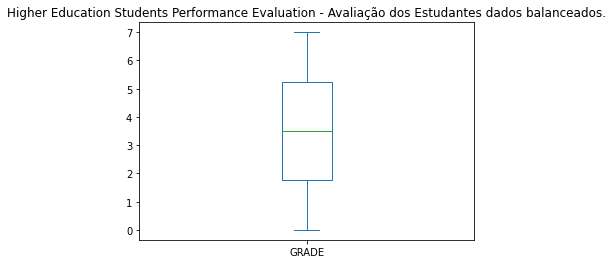

In [22]:

HB = HespeBalanceado["GRADE"].sort_index().plot(kind="box")
HB.set_title('Higher Education Students Performance Evaluation - Avaliação dos Estudantes dados balanceados.')
HB.plot()

> - com aplicação do balanceamento dos dados, é possivel observar a centralização do 2º Quartil que representa a Mediana.

Text(0.5, 1.0, 'Higher Education Students Performance Evaluation - Avaliação dos Estudantes dados balanceados.')

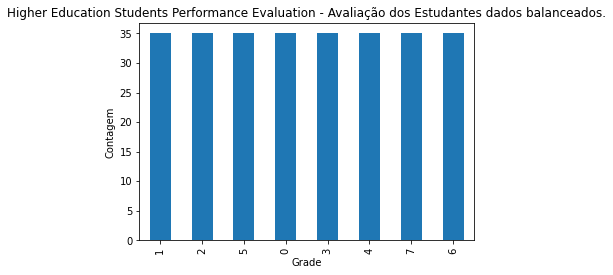

In [23]:
HESPE_DATA_PLT = HespeBalanceado["GRADE"].value_counts().plot(kind="bar")
HESPE_DATA_PLT.set_xlabel('Grade')
HESPE_DATA_PLT.set_ylabel('Contagem')
HESPE_DATA_PLT.set_title('Higher Education Students Performance Evaluation - Avaliação dos Estudantes dados balanceados.')

> - Em representação de barras podemos observar o balanceamento dos dados.

#### (C) Utilize a biblioteca AUTOML para fazer a previsão. Para o melhor algoritmo, teste 3 variações de um dos seus hiperparâmetros. <br> <br>

In [28]:
HespeDataX = HespeBalanceado.iloc[:, :-1].values    
HespeDataY = HespeBalanceado.iloc[:, -1].values     #Ultima Coluna do DF

print("tupla de elementos para H_Data_X {}".format(HespeDataX.shape))
print("tupla de elementos para H_Data_Y {}".format(HespeDataY.shape))


tupla de elementos para H_Data_X (280, 30)
tupla de elementos para H_Data_Y (280,)


In [31]:
from sklearn.model_selection import train_test_split #Biblioteca Para treinamento de subconjuntos Aleatórios.
                                                     #Random_state 42, padrão mais usado como random de estados.

X_train, X_test, y_train, y_test = train_test_split(HespeDataX, HespeDataY, test_size=0.314, random_state=42, stratify=HespeDataY)

In [35]:
####conda install -c conda-forge auto-sklearn
import autosklearn 




ModuleNotFoundError: No module named 'autosklearn'

In [14]:
corr_matrix = DATA_AUX.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool_))
to_drop = [column for column in upper.columns if any(upper[column] > 0.40)]

In [15]:
to_drop

['FATHER_EDU', 'EXP_GPA']

**PCA** Normalizar dados e atributo alvo:

PCA aplicado em **3** componentes principais:

In [16]:
PCA_3 = PCA(n_components = 3)

componentes = PCA_3.fit_transform(x)
data_pca_5 = pd.DataFrame(componentes, columns = ["PCA1","PCA2","PCA3"])
data_pca_5["DOS"] = y

data_pca_5

NameError: name 'PCA' is not defined

**3.3)** Escolha 5 valores de K e mostre os resultados (escolha 3 métricas de avaliação e mostre a matriz de confusão) e explique os resultados encontrados. 

> Aplicando o KNN para 5 valores => K: 1, 5, 9

In [ ]:
LISTA_K = [1,5,9]

KNN_LISTA = []

for k in LISTA_K:
    KNN_LISTA.append(KNeighborsClassifier(n_neighbors = k))

for knn in KNN_LISTA:
    knn.fit(x_train, y_train)

In [ ]:
Resultado_Lista = []

for knn in KNN_LISTA:
    Resultado_Lista.append(knn.predict(x_test))

**Acurácia dos dados**

In [ ]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')

1-NN
Acurácia: 0.08333
5-NN
Acurácia: 0.04167
9-NN
Acurácia: 0.04167


> A acuraria dos dados, é usado pra classificar a veracidade dos dados. Pode observar que quando o numero  **k** muda de 1 para 9 o classificador diminue, apresentando valores não satisfatórios. 

**Precisão dos dados**

In [ ]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")

1-NN
Precisão: 0.03846
5-NN
Precisão: 0.00806
9-NN
Precisão: 0.00617


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> A precisão dos dados calcula a incidencia previu a falhas, o quanto os dados estão corretos. 

**Matriz de confusão**

In [ ]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')

1-NN
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]
5-NN
Matriz de Confusão:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

É observado através da matriz de confusão: <br>
**Verdadeiros Negativos** amplia o incremento de K.<br>
**Verdadeiros Positivos** amplia  o incremento de K.<br>
**Falsos Positivos** reduz o incremento de K.<br>
**Falsos Negativos** reduz o incremento de K.<br>

Com essa relação é podemos inferir que o modelo propende a classificar em maior quantidade instâncias como verdadeiras e em baixa quantidade instâncias como falsas com o aumento de K. <br>

<center>

|||
| :- | :- |
| VN | FP |
| FN | VP |

<center>
<br>
Podemos ver que a Base de dados é desbalanceada, visto que algumas falhas não tem muita relção com outras, fazendo assim com que o classificador tenha uma representação com pontos distantes.

**Sensibilidade**

In [ ]:
for result, k in zip(Resultado_Lista, LISTA_K):
    print(f'{k}-NN')
    print(f"Precisão: {metrics.recall_score(y_test, result, average='macro'):.5f}")

1-NN
Precisão: 0.02564
5-NN
Precisão: 0.01613
9-NN
Precisão: 0.01852


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


A sensibilidade é definida como um aferidor do caso onde a falha maior foi a **DOS**.

**3.4)** Escolha 2 métricas de similaridade (diferentes distâncias ou outras métricas - correlação, por exemplo) para definir o(s) vizinho(s) mais próximos e explique os resultados encontrados. 

> Para analise dos casos foi estudado as metricas no site:
<a href="https://scikit-learn.org/stable/modules/model_evaluation.html#precision-recall-f-measure-metrics">Métricas e pontuação: quantificando a qualidade das previsões </a>


In [ ]:
##chebyshev
KNN = KNeighborsClassifier(n_neighbors = 3, metric = "chebyshev")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)


print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")


Acurácia: 0.04167
Precisão: 0.02857
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sensibilidade: 0.01429


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
##manhattan
KNN = KNeighborsClassifier(n_neighbors = 3, metric = "manhattan")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)


print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")


Acurácia: 0.08333
Precisão: 0.04040
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Sensibilidade: 0.03030


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


> Com a metrica **manhattan** Podemos perceber que houve uma mudança nas metricas de Acurácia e Precisão em relação as outras.

**3.5)** Melhor K e melhor distância e testar com o conjunto de atributos do item 2.

O melhor K na analise foi o K=1 e utilizar a matrica ***manhattan***

In [ ]:
x = DATA_AUX.drop(["DOS"], axis = 1)
y = DATA_AUX.loc[:, "DOS"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 1)

KNN = KNeighborsClassifier(n_neighbors = 1, metric = "manhattan")
KNN.fit(x_train, y_train)
result = KNN.predict(x_test)

In [ ]:
print(f'Acurácia: {metrics.accuracy_score(y_test, result):.5f}')
print(f"Precisão: {metrics.precision_score(y_test, result, average='macro'):.5f}")
print(f'Matriz de Confusão:\n {metrics.confusion_matrix(y_test, result)}')
print(f"Sensibilidade: {metrics.recall_score(y_test, result, average='macro'):.5f}")

Acurácia: 0.08333
Precisão: 0.05263
Matriz de Confusão:
 [[0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Sensibilidade: 0.03947


C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\a1947482\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Observamos que ao Aplicar apenas 1 componente tivemos uma melhora em relação as outras metricas, numero superior da Acurácia, e na precisão dos dados.
A matriz de confusão teve uma variação maior, é possivel ver mais representações graficas.


**4)** Considerando a matriz de confusão abaixo, quais são os valores das métricas listadas abaixo?

In [ ]:
##Dependências
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from scipy.integrate import trapz

In [ ]:
def sensi(fruta: dict[str, int]): ## sensi - VP / (VP + FN)
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def especi(fruta: dict[str, int]): ## Especi - VN / (VN + FP)
  return fruta["vn"] / (fruta["vn"] + fruta["fp"])

def precisao(fruta: dict[str, int]): ## Precisão - VP / (VP + FP)
  return fruta["vp"] / (fruta["vp"] + fruta["fp"])

def f1(precisao, sensi): ## F1 = (2 * Precisão * sensi) / (Precisão + sensi)
  return (2 * precisao * sensi) / (precisao + sensi)

def acuracia(fruta: dict[str, int]): ## Acurácia = (VN + VP) / (VP + FN + VN + FP)
  return (fruta["vn"] + fruta["vp"]) / (fruta["vp"] + fruta["fn"] + fruta["vn"] + fruta["fp"])   

def phi(fruta: dict[str, int]):  ## Coeficiente de Correlação de Matthews (phi) = (VP * VN – FP * FN) / sqrt((VP + FP) * (VP + FN) * (VN + FP) * (VN + FN))
  return (((fruta["vp"] * fruta["vn"]) - (fruta["fp"] + fruta["fn"])) / math.sqrt((fruta["vp"] + fruta["fp"]) * (fruta["vp"] + fruta["fn"]) * (fruta["vn"] + fruta["fp"]) * (fruta["vn"] + fruta["fn"])))

def tpr(fruta: dict[str, int]): ## True Positive Rate - Taxa de Verdadeiro Positivo = (VP / (VP + FN))
  return fruta["vp"] / (fruta["vp"] + fruta["fn"])

def fpr(fruta: dict[str, int]): ## False Positive Rate - Taxa de Falso Positivo = (FP / (VN + FP))
  return fruta["fp"] / (fruta["vn"] + fruta["fp"])

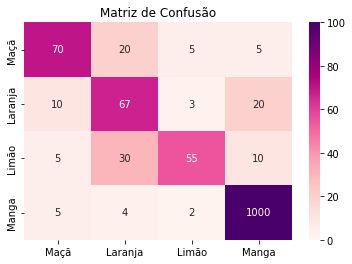

In [ ]:
mat_confu = np.array([[70, 20, 5, 5], [10, 67, 3, 20], [5, 30, 55, 10], [5, 4, 2, 1000]])
dataframe_MC = pd.DataFrame(mat_confu, index = ['Maçã', 'Laranja', 'Limão', 'Manga'], columns = ['Maçã', 'Laranja', 'Limão', 'Manga'])

res = sn.heatmap(dataframe_MC, annot = True, vmin = 0.0, vmax = 100.0, cmap = plt.cm.RdPu, fmt = 'g')
plt.yticks([0.5, 1.5, 2.5, 3.5], ['Maçã', 'Laranja', 'Limão', 'Manga'], va = 'center')
plt.title('Matriz de Confusão')
plt.show()

**Analise da Matriz de Confusão**

In [ ]:
#Analise da Diagonal Principal
#identificação dos VPs
#Divisão dos VN, VP, FN, FP
maca = {"vp":70, "fp":(30), "fn":(20), "vn":(1125)}
laranja = {"vp":67, "fp":(33), "fn":(54), "vn":(1125)}
limao = {"vp":55, "fp":(45), "fn":(10), "vn":(1137)}
manga = {"vp":1000, "fp":(11), "fn":(35), "vn":(192)}

In [ ]:
# Calculo das Métricas
Sensibilidade = (sensi(maca) + sensi(laranja) + sensi(limao) + sensi(manga)) / 4
especificidade = (especi(maca) + especi(laranja) + especi(limao) + especi(manga)) / 4
Precisao = (precisao(maca) + precisao(laranja) + precisao(limao) + precisao(manga)) / 4 
f1 = f1(Precisao, Sensibilidade)
acuracia = (acuracia(maca) + acuracia(laranja) + acuracia(limao) + acuracia(manga)) / 4 
phi = (phi(maca) + phi(laranja) + phi(limao) + phi(manga)) / 4 
# ROC - AUC
tpr = (tpr(maca) + tpr(laranja) + tpr(limao) + tpr(manga)) / 4 
fpr = (fpr(maca) + fpr(laranja) + fpr(limao) + fpr(manga)) / 4 

In [ ]:

Metricas = ['Sensibilidade','Especificidade','Precisão','F1','Acurácia','Coeficiente de Matthews']
Func = [Sensibilidade,especificidade,Precisao,f1,acuracia,phi]
for Met,Fun in zip( Metricas,Func):
    print('{} -> {:.2f}'.format(Met,Fun))


Sensibilidade -> 0.79
Especificidade -> 0.96
Precisão -> 0.73
F1 -> 0.76
Acurácia -> 0.95
Coeficiente de Matthews -> 0.71


##### AUC

In [ ]:
Metricas = ['verdadeiro positivo','falso positivo']
Func = [tpr,fpr]
for Met,Fun in zip( Metricas,Func):
    print('{} -> {:.2f}'.format(Met,Fun))


verdadeiro positivo -> 0.79
falso positivo -> 0.04


In [ ]:
y = (0, tpr, 1)
x = (0, fpr, 1)
auc = trapz(y, x)
print('Área sob a curva - AUC = {:.2f}'.format(auc))

Área sob a curva - AUC = 0.87


> **Como você resolveria o problema dessa base de dados observando as métricas de avaliação?**
 - Analisando a base de dados e as métricas é possivel identificar um desbalançeamento dos dados, assim fazendo com que as informações tomem um rumo imparcial. assim com o objetivo de balancear as informações são utilizados tecnicas de clusterização assim gerando sub amostras e realizando outro dimensionamento das informações.

**5)** Elabore uma pergunta e responda sobre "Preconceito e Inteligência Artificial", refletindo aspectos importantes do método que uma pessoa engenheiro de dados/cientista de dados deve conhecer e se preocupar garantindo ética nos modelos criados.

>> Uma Inteligência Artificial pode tratar um ser humano com preconceito?


    Uma IA é desenvolvida a partir de uma base de informações no qual vai ser fortalezida em experiências de acordo com as interações e combinações que ela é aplicada. Assim é muito importante tomar cuidado em quais métricas serão utilizadas para que a máquina consiga consumir informações que garanta a melhor experência possivel.
    Em ambientes onde a base de informações coletadas pela IA seja influenciado por preconceitos, e comportamentos tendencioso vai fazer com que a máquina tome essas ações como as corretas e assim sendo replicadas e assim proporcionando situações não esperadas.
    Realizar procedimentos de filtro é essencial para que a malha de interação da IA com o ambiente seja o mais eficiente possível.

